# F15

In [1]:
import numpy as np
import sympy as sm
from sympy import UnevaluatedExpr as uneval
from IPython.display import display, Math
from sympy.physics.vector.printing import vlatex
import VTOLParam as P

# Single link arm Parameter File
from control import tf, bode
import matplotlib.pyplot as plt

# flag to define if using dB or absolute scale for M(omega)
dB_flag = False

### (a) Draw by hand the Bode plot of the altitude transfer function from force $\tilde F$ to altitude $\tilde h$. Use the ```bode``` command (from Matlab or Python) and compare your results.

Plot the bode plot with code:

In [2]:
1/(P.mc + 2*P.mr)

0.6666666666666666

c:\Users\brend\miniforge3\envs\ME431_Controls\Lib\site-packages\control\config.py:363: FutureWarning: keyword 'margins' is deprecated; use 'display_margins'
  warnings.warn(


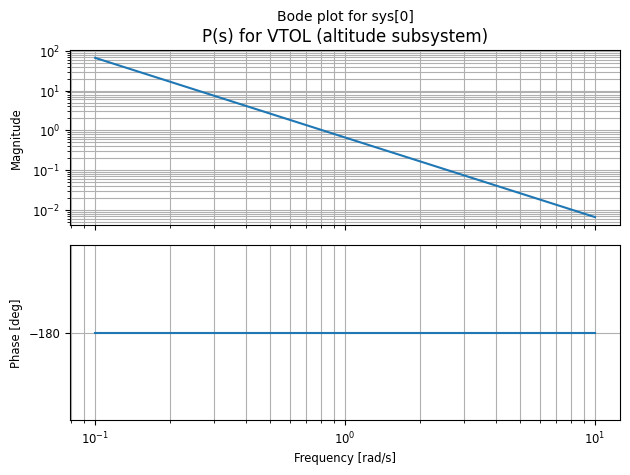

In [3]:
Plant_alt = tf([1/(P.mc + 2*P.mr)],
               [1, 0, 0])

fig=plt.figure()
bode(Plant_alt,dB=dB_flag,margins=False)
fig.axes[0].set_title('P(s) for VTOL (altitude subsystem)')

# if you want specific values at specific frequencies , you can
# do the following(but the magnitudes are absolute, not dB)
# mag, phase,omega=bode(Plant, plot=False, omega=[0.3, 10.0, 1000.0])

plt.show()

### (b) Draw by hand the Bode plot of the inner loop transfer function for the lateral dynamics from torque $\tau$ to angle $\theta$. Use the ```bode``` command and compare your results.

Plot the bode plot with code:

c:\Users\brend\miniforge3\envs\ME431_Controls\Lib\site-packages\control\config.py:363: FutureWarning: keyword 'margins' is deprecated; use 'display_margins'
  warnings.warn(


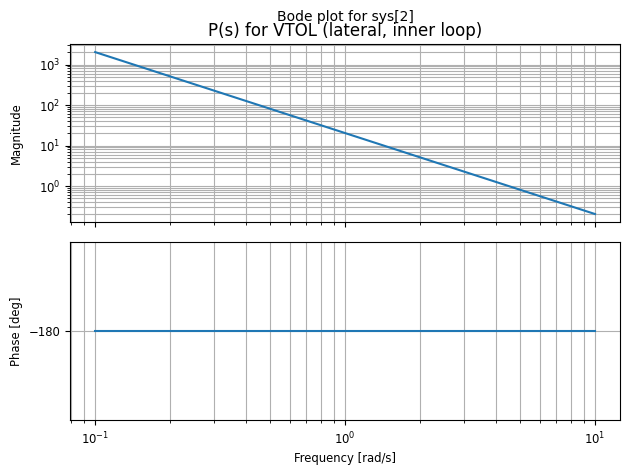

In [4]:
Plant_in = tf([1/(P.Jc + 2*P.mr*P.d**2)],
              [1, 0, 0])

fig=plt.figure()
bode(Plant_in,dB=dB_flag,margins=False)
fig.axes[0].set_title('P(s) for VTOL (lateral, inner loop)')

# if you want specific values at specific frequencies , you can
# do the following(but the magnitudes are absolute, not dB)
# mag, phase,omega=bode(Plant, plot=False, omega=[0.3, 10.0, 1000.0])

plt.show()

### (c) Draw by hand the Bode plot of the outer loop transfer function for the lateral dynamics from angle $\theta$ to position $z(t)$. Use the ```bode``` command and compare your results.

Plot bode plot with code:

In [5]:
s = sm.symbols(r's')
(-P.Fe/(P.mc + 2*P.mr)) / (s * (s + (P.mu/(P.mc + 2*P.mr))))
a = P.mu/(P.mc + 2*P.mr)
uneval(-P.Fe/P.mu) * (1/s) * (a / (s+a))

0.0666666666666667*(-147.15)/(s*(s + 0.0666666666666667))

c:\Users\brend\miniforge3\envs\ME431_Controls\Lib\site-packages\control\config.py:363: FutureWarning: keyword 'margins' is deprecated; use 'display_margins'
  warnings.warn(


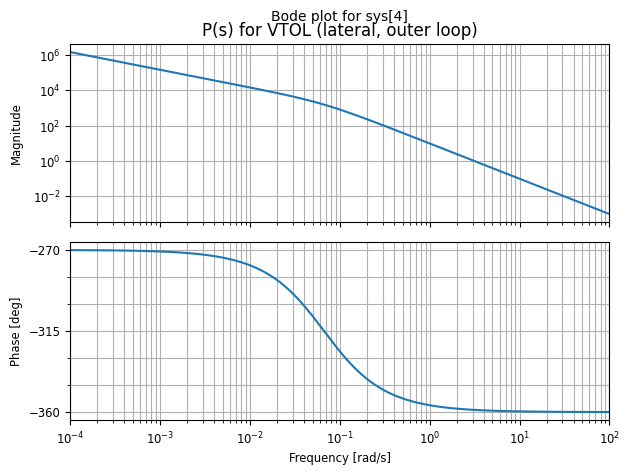

In [6]:
Plant_out = tf([-P.Fe/(P.mc + 2*P.mr)],
               [1, P.mu/(P.mc + 2*P.mr), 0])

fig=plt.figure()
bode(Plant_out,dB=dB_flag,margins=False, omega_limits=(10**-4, 10**2))
fig.axes[0].set_title('P(s) for VTOL (lateral, outer loop)')

# if you want specific values at specific frequencies , you can
# do the following(but the magnitudes are absolute, not dB)
# mag, phase,omega=bode(Plant, plot=False, omega=[0.3, 10.0, 1000.0])

plt.show()

# F16

For the altitude hold loop of the VTOL system, use the bode command (from
 Matlab or Python) to create a graph that simultaneously displays the Bode plots for
 (1) the plant, and (2) the plant under PID control using the control gains calculated
 in Homework F.10. Use the dirty derivative when implementing the derivative
 portion of the PID control.

kp_z:  -0.4933741080530072
kd_z:  -0.3103092082908597
ki_z:  -0.18
kp_h:  7.260000000000002
kd_h:  4.6662
kp_th:  23.8128
kd_th:  1.5305136


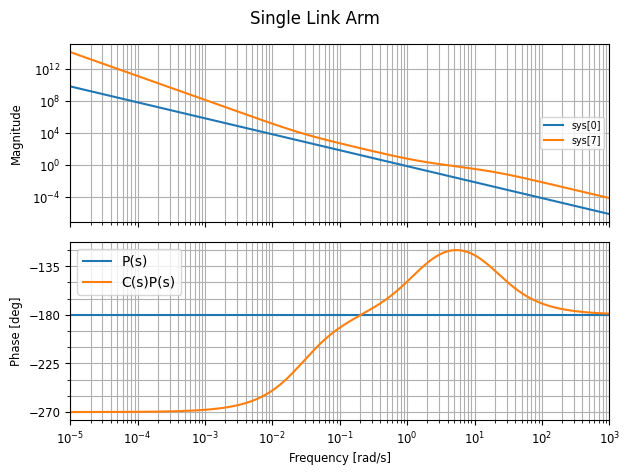

In [8]:
from ctrlPIDhwF10 import ctrlPID

P10 = ctrlPID()

C_pid = tf([(P10.kd_h+P10.kp_h*P10.sigma), 
            (P10.kp_h+P10.ki_h*P10.sigma), 
            P10.ki_h],
           [P10.sigma, 1, 0])

fig = plt.figure()
bode([Plant_alt, Plant_alt*C_pid], omega_limits=[10**(-5), 10**(3)], dB=dB_flag)
fig.suptitle('Single Link Arm')
plt.legend(['P(s)', 'C(s)P(s)'])

plt.show()

### (a) What is the tracking error if the reference input is a parabola $\left( \frac{1}{s^3} \right)$ with curvature 5?

In [28]:
kd_h, kp_h, ki_h = sm.symbols(r'k_{d\,h} k_{p\,h} k_{i\,h}', real=True, positive=True)
mc, mr, sigma = sm.symbols(r'm_c m_r \sigma', real=True, positive=True)
s = sm.symbols(r's')

C_pid_h = uneval(1/(mc + 2*mr))/s**2
P_pid_h = uneval((kd_h + kp_h*sigma)*s**2 + (kp_h + ki_h*sigma)*s + ki_h) / (sigma*s**2 + s)

display(Math(r'P_h(s)=' + vlatex(P_pid_h)))
display(Math(r'C_h(s)=' + vlatex(C_pid_h)))

C_pid_h = C_pid_h.doit()
P_pid_h = P_pid_h.doit()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [36]:
display(Math(r'\frac{1}{1+PC}=' + vlatex(1/(1+P_pid_h*C_pid_h))))

tracking = sm.limit(1 / (1 + P_pid_h*C_pid_h) * 1/s**3, s, 0)

display(Math(r'\lim_{s\rightarrow0} \frac{1}{1+P_h C_h}=' + vlatex(tracking)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### (b) If all of the frequency content of the noise $n(t)$ is greater than $\omega_{no} = 30$ radians per second, what percentage of the noise shows up in the output signal $h$?

In [37]:
w_no = 30

mag_loop, _, _ = bode(Plant_alt*C_pid, db=False, plot=False, omega=[w_no])
print(f'Magnitude of loop at {w_no} is {mag_loop[0]}')

# convert the difference to dB
B_n = 20 * np.log10(mag_loop[0])
print('B_n = ', B_n)

gamma_dno = 10**(B_n/20)
print('gamma = ', gamma_dno)
print(f'So, {gamma_dno*100:.2f}% of the input disturbance shows up in PID control.')

Magnitude of loop at 30 is 0.06206248474511209
B_n =  -24.14341681819237
gamma =  0.062062484745112084
So, 6.21% of the input disturbance shows up in PID control.


c:\Users\brend\miniforge3\envs\ME431_Controls\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


## Lateral Controller: Inner Loop

For the inner loop of the lateral controller for the VTOL system, use the bode
 command to create a graph that simultaneously displays the Bode plots for (1)
 the plant, and (2) the plant under PD control, using the control gains calculated in
 HomeworkF.8. Usethedirty derivative when implementing the derivative portion
 of the PD control.

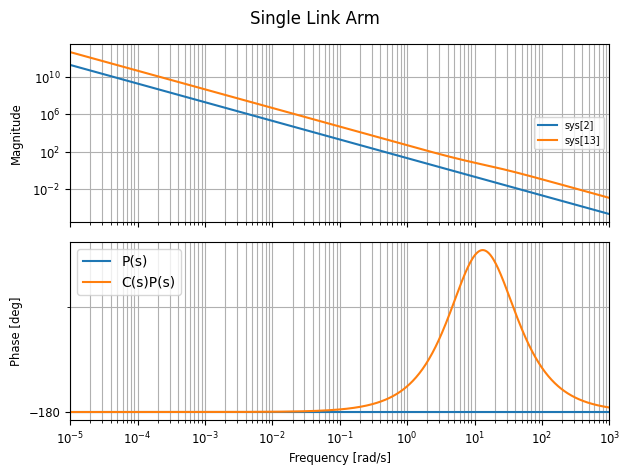

In [38]:
C_in = tf([P10.kd_th + P10.sigma * P10.kp_th, P10.kp_th], [P10.sigma, 1])

fig = plt.figure()
bode([Plant_in, Plant_in*C_in], omega_limits=[10**(-5), 10**(3)], dB=dB_flag)
fig.suptitle('Single Link Arm')
plt.legend(['P(s)', 'C(s)P(s)'])

plt.show()

### (c) If the frequency content of the input disturbance is all contained below $\omega_{d_{in}} = 2$ radians per second, what percentage of the input disturbance shows up in the output?

In [41]:
w_din = 2

mag_plant, _, _ = bode(Plant_in, db=False, plot=False, omega=[w_din])
print(f'Magnitude of plant at {w_din} is {mag_plant[0]}')

mag_loop, _, _ = bode(Plant_in*C_in, db=False, plot=False, omega=[w_din])
print(f'Magnitude of loop at {w_din} is {mag_loop[0]}')
print(f'Difference is {mag_loop[0] - mag_plant[0]}\n')

# convert the difference to dB
diff = 20 * np.log10(mag_loop[0] - mag_plant[0])
print('diff = ', diff)

gamma_din = 10**(-diff/20)
print('gamma = ', gamma_din)
print(f'So, {gamma_din*100:.2f}% of the input disturbance shows up in PID control.')

Magnitude of plant at 2 is 5.08130081300813
Magnitude of loop at 2 is 123.50389305604902
Difference is 118.4225922430409

diff =  41.46869126910754
gamma =  0.008444334658269272
So, 0.84% of the input disturbance shows up in PID control.


c:\Users\brend\miniforge3\envs\ME431_Controls\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


### (d) If a sensor for $\theta$ is to be selected, what are the characteristics of the sensor (frequency band and size) that would result in measurement noise for $\theta$ that is less than $0.1$ degrees?

In [48]:
# solve using noise attenuation
th_noise = 0.1 * np.pi/180 # rad

mag_loop, _, _ = bode(Plant_in*C_in, db=False, plot=False, omega=[th_noise])
print(f'Magnitude of loop at {th_noise} is {mag_loop[0]}')

# convert the difference to dB
diff = 20 * np.log10(mag_loop[0] - mag_plant[0])
print('diff = ', diff)

gamma_din = 10**(-diff/20)
print('gamma = ', gamma_din)
print(f'So, {gamma_din*100:.2f}% of the noise shows up in PID control.')

Magnitude of loop at 0.0017453292519943296 is 158887829.8956663
diff =  164.02176804751537
gamma =  6.293780574009581e-09
So, 0.00% of the noise shows up in PID control.


## Lateral Control: Outer Loop

For the outer loop of the lateral controller for the VTOL system, use the bode
 command to create a graph that simultaneously displays the Bode plots for (1) the
 plant, and (2) the plant under PID control, using the control gains calculated in
 Homework F.10.

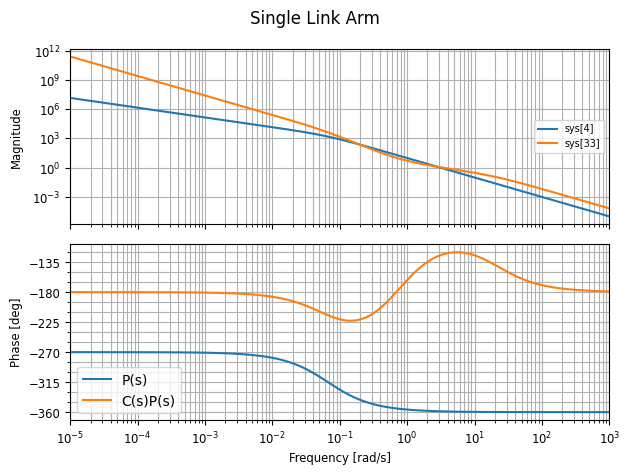

In [46]:
C_out = tf([P10.kd_z + P10.kp_z * P10.sigma,
            P10.kp_z + P10.ki_z * P10.sigma,
            P10.ki_z],
           [P10.sigma, 1, 0])

fig = plt.figure()
bode([Plant_out, Plant_out*C_out], omega_limits=[10**(-5), 10**(3)], dB=dB_flag)
fig.suptitle('Single Link Arm')
plt.legend(['P(s)', 'C(s)P(s)'])

plt.show()

### (e) To what percent error can the closed loop system track the desired input if all of the frequency content of $z_r(t)$ is below $\omega_r = 0.1$ radians per second?

In [49]:
omega_r = 0.1 # rad/s

mag_plant, _, _ = bode(Plant_out, db=False, plot=False, omega=[omega_r])
print(f'Magnitude of plant at {omega_r} is {mag_plant[0]}')

mag_loop, _, _ = bode(Plant_out*C_out, db=False, plot=False, omega=[omega_r])
print(f'Magnitude of loop at {omega_r} is {mag_loop[0]}')
print(f'Difference is {mag_loop[0] - mag_plant[0]}\n')

# convert the difference to dB
diff = 20 * np.log10(mag_loop[0] - mag_plant[0])
print('diff = ', diff)

gamma_din = 10**(-diff/20)
print('gamma = ', gamma_din)
print(f'So, {gamma_din*100:.2f}% of the tracking disturbance shows up in PID control.')

Magnitude of plant at 0.1 is 816.2413387454244
Magnitude of loop at 0.1 is 1499.0479360373722
Difference is 682.8065972919478

diff =  56.685954172510826
gamma =  0.0014645435529856631
So, 0.15% of the tracking disturbance shows up in PID control.


### (f) If the frequency content of an output disturbance is contained below $\omega_{d_{out}} = 0.01$ radian/sec, what percentage of the output disturbance will be contained in the output?

In [52]:
# solve using noise attenuation
w_dout = 0.1 * np.pi/180 # rad

mag_loop, _, _ = bode(Plant_out*C_out, db=False, plot=False, omega=[w_dout])
print(f'Magnitude of loop at {w_dout} is {mag_loop[0]}')

# convert the difference to dB
diff = 20 * np.log10(mag_loop[0] - mag_plant[0])
print('diff = ', diff)

gamma_din = 10**(-diff/20)
print('gamma = ', gamma_din)
print(f'So, {gamma_din*100:.2f}% of the output disturbance up in PID control.')

Magnitude of loop at 0.0017453292519943296 is 8692244.739282308
diff =  138.7818232338959
gamma =  1.150558852594376e-07
So, 0.00% of the output disturbance up in PID control.
